In [1]:
import SimpleITK as sitk
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
def n4_bias_correction(image):
    """
    Applies N4ITK bias correction.
    """
    img = image.astype(np.float32)
    
    img_sitk = sitk.GetImageFromArray(image)
    img_sitk = sitk.Cast(img_sitk, sitk.sitkFloat32)
    corrector = sitk.N4BiasFieldCorrectionImageFilter()
    corrected_sitk = corrector.Execute(img_sitk)
    corrected = sitk.GetArrayFromImage(corrected_sitk)
    
    return corrected

In [3]:
def process_dataset(input_dir, output_dir):
    """Process full dataset with aspect preservation"""
    os.makedirs(output_dir, exist_ok=True)
    
    for class_dir in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_dir)
        output_class_path = os.path.join(output_dir, class_dir)
        os.makedirs(output_class_path, exist_ok=True)
        
        for file_name in tqdm(os.listdir(class_path), desc=f"Processing: {class_path}"):
            input_path = os.path.join(class_path, file_name)
            output_path = os.path.join(output_class_path, file_name)
            
            try:
                image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE) 
                corrected_image = n4_bias_correction(image)
                cv2.imwrite(output_path, corrected_image)
                
            except Exception as e:
                print(f"Error processing {input_path}: {str(e)}")

In [6]:
process_dataset(input_dir= "Brain tumor_D2_Original",
                output_dir= "Brain tumor_D2_N4 Bias Correction")

Processing: Brain tumor_D2_Original\glioma:   0%|          | 0/300 [00:00<?, ?it/s]

Processing: Brain tumor_D2_Original\pituitary: 100%|██████████| 300/300 [43:01<00:00,  8.61s/it]


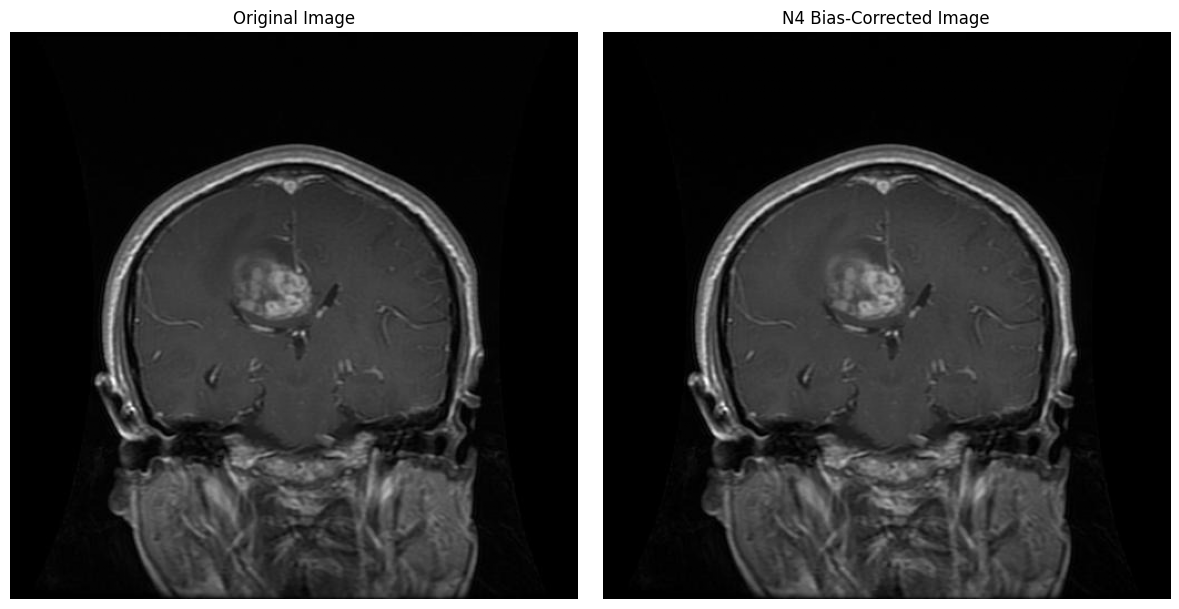

In [5]:
image_path = 'Brain tumor_D2_Original\glioma\Te-gl_0040.jpg' 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
corrected_image = n4_bias_correction(image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(corrected_image, cmap='gray')
plt.title('N4 Bias-Corrected Image')
plt.axis('off')
plt.tight_layout()
plt.show()